Emissions vs Global Temperature Anomalies

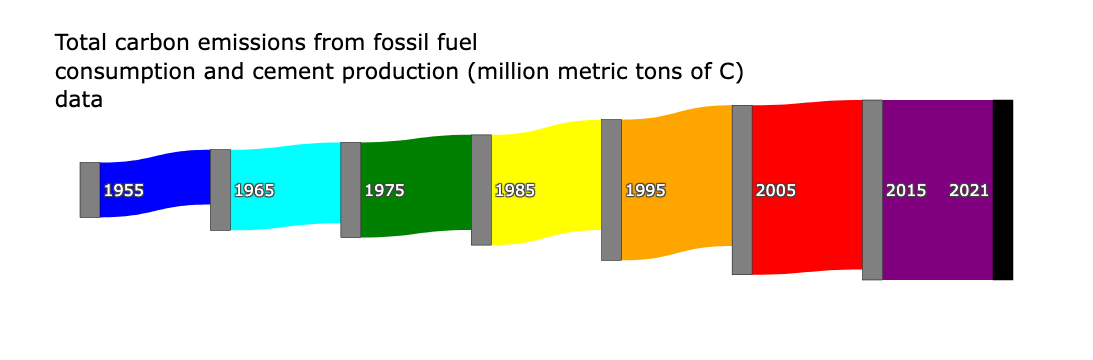

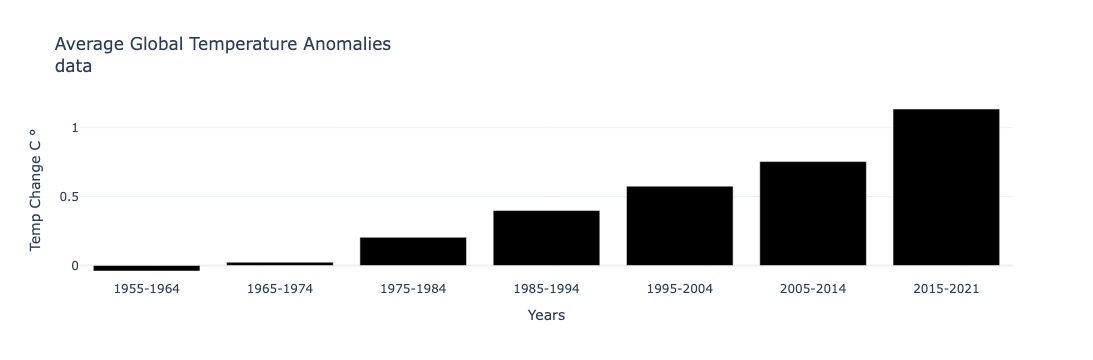

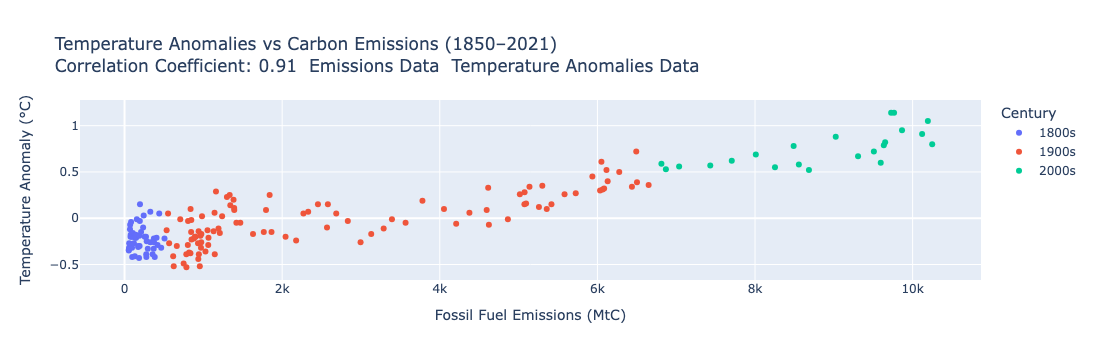

In [41]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

start_year = 1850
end_year = 2021

# Emissions filtering
EMISSIONS_DATA = 'https://raw.githubusercontent.com/plotly/Figure-Friday/'\
        'refs/heads/main/2025/week-21/global.1751_2021.csv'
df_emission = pd.read_csv(EMISSIONS_DATA)
EMISSION_COL_NAME = 'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'
# filter emission data to use between 1850 and 2021
df_filtered_carbon_emissions_1850_2021 = df_emission[(df_emission['Year'] >= start_year) & (df_emission['Year'] <= end_year)]
EMISSION_TITLE='Total carbon emissions from fossil fuel<br>consumption and cement production (million metric tons of C)'

# Temp Anomalies Filtering
TEMP_ANOMALIES_DATA = '../data/global_temp_anomaly.csv'
df_temp_anomaly = pd.read_csv(TEMP_ANOMALIES_DATA,comment='#')
ANOMALY_COL_NAME = 'Anomaly'
df_filtererd_temp_anomalies_1850_2021 = df_temp_anomaly[(df_temp_anomaly['Year'] >= start_year) & (df_temp_anomaly['Year'] <= end_year)]


# SANKEY CHART: Total Emissions by Year
# Report 5 10 year gaps and 1 6 year gap of emissions beginning in 1955 and ending in 2021

# years to report data
selected_data_years_list = [1965, 1975, 1985, 1995, 2005, 2015, 2021]
# get total emissions for each year 
emissions = df_emission[df_emission['Year'].isin(selected_data_years_list)][EMISSION_COL_NAME].tolist()

# get Sankey node labels base on source and target
data = {
    'source': [0, 1, 2, 3, 4, 5, 6],
    'target': [1, 2, 3, 4, 5, 6, 7],
    'value': emissions,
    'source_label': ['1955', '1965', '1975', '1985', '1995', '2005', '2015'],
    'target_label': ['1965', '1975', '1985', '1995', '2005', '2015', '2021'],
}
df = pd.DataFrame(data)

# Create labels from source and target
# consolidate source and target labels into a single list
labels = list(pd.unique(df[['source_label', 'target_label']].values.ravel()))
link_colors = ['blue','aqua','green','yellow','orange','red','purple']

# Carbon Emissions from Gas
# snap arrangement when exact locations are not specified for Sankey

fig = go.Figure(data=[go.Sankey(
    arrangement='snap',
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
    ),
    link=dict(
        source=df['source'],
        target=df['target'],
        value=df['value'],
        color=link_colors
    )
)])
fig.update_traces(node_color = ['gray','gray','gray','gray','gray','gray','gray'])
fig.update_layout(
    hoverlabel=dict(
        font=dict(
              size=14,
              color="white"
          ),
        bgcolor="black",  # Example: white background
        font_size=16,      # Example: font size 16
        font_family="Rockwell" # Example: Rockwell font
    )
)
fig.update_layout(font_size=16,\
    font_color="white",
    title_font_color="black",
        title_text=f"{EMISSION_TITLE}<br><a href='https://raw.githubusercontent.com/plotly/Figure-Friday/refs/heads/main/2025/week-21/global.1751_2021.csv' target='_blank'>data</a>")
fig.show()

# BAR CHART: Temperature Anomalies by Year

def avg_net_temp_anomaly (df, year):
    '''
    Get average temperature anomoly based on year
    Years before 2015 look at averages between start year 
    (included) and start year + 9. The year 2015 only looks 
    at start year and start year + 6 temperatures up through 2021.
    '''
    start_year = int(year)
    # only have data up to 2021
    if start_year == 2015:
        end_year = 2021
    else:
        # most amounts are 9 year spread
        end_year = start_year + 9

    filtered_df = df[(df["Year"] >= start_year) & (df["Year"] <= end_year)]
    average = filtered_df["Anomaly"].sum()/6 if start_year == 2015 else filtered_df["Anomaly"].sum()/9
    return average
    
def get_global_temp_anomalies():
    # Global Temperatures
    # https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series

    # remove 1st 3 lines from file
    # df_temp_anomaly = pd.read_csv('https://raw.githubusercontent.com/rebeccapeltz/'\
    #     'emissions/refs/heads/main/global-temp-anomaly-data.csv',skiprows=4)
    # df_temp_anomaly = pd.read_csv(TEMP_ANOMALIES_DATA,comment='#')
    # print(df_temp_anomaly.head())
    
    temp_anomalies_averages = []
    anomaly_years = [ 1955, 1965, 1975, 1985,1995,2005,2015]
    
    for year in anomaly_years:
        total = avg_net_temp_anomaly(df_temp_anomaly,year)
        temp_anomalies_averages.append(total)
    
    label_years = ['1955-1964', '1965-1974', '1975-1984','1985-1994','1995-2004','2005-2014','2015-2021']
    
    # Create the bar chart
    fig2 = go.Figure(data=[
        go.Bar(x=label_years, y=temp_anomalies_averages, marker_color='black')
    ])
    
    # Update layout (optional)
    fig2.update_layout(
        title='Average Global Temperature Anomalies<br><a href="https://raw.githubusercontent.com/rebeccapeltz/emissions/refs/heads/main/global-temp-anomaly-data.csv" target="_blank">data</a>',
        xaxis_title='Years',
        yaxis_title='Temp Change C &#176;',
        template='plotly_white',
        xaxis=dict(tickformat='%Y', tickvals=label_years)
    )
    return fig2


fig2 = get_global_temp_anomalies()
fig2.show()



# CORRELATION: Do temperature anomalies increase with increased C02 emissions

# Merge both DataFrames on 'Year'
df_merged = pd.merge(df_filtered_carbon_emissions_1850_2021, df_filtererd_temp_anomalies_1850_2021, on='Year')

# Get list of years from merged
df_years = df_merged[['Year']].copy()

# Add century to df merged
df_merged['Century'] = ((df_merged['Year'] // 100) * 100).astype(str) + 's'

# Get Correllation Coefficient
correlation = df_filtered_carbon_emissions_1850_2021[EMISSION_COL_NAME].corr(df_filtererd_temp_anomalies_1850_2021[ANOMALY_COL_NAME])

plot_title = 'Temperature Anomalies vs Carbon Emissions (1850–2021)'\
          f'<br>Correlation Coefficient: {correlation:.2f}'\
          f'  <a href="{EMISSIONS_DATA}" target=_blank>Emissions Data</a>'\
          f'  <a href="{TEMP_ANOMALIES_DATA}" target=_blank>Temperature Anomalies Data</a>'

# Plot scatterplot
fig = px.scatter(
    df_merged,
    x=EMISSION_COL_NAME,
    y=ANOMALY_COL_NAME,
    color='Century', 
    labels={
        EMISSION_COL_NAME: "Fossil Fuel Emissions (MtC)",
        ANOMALY_COL_NAME: "Temperature Anomaly (°C)"
    },
    title=plot_title
)

fig.show()
